In [1]:
using Plots
using Random
using LaTeXStrings
include("../Potential/hybrid.jl")
include("../inflationBasicEqs.jl")
include("../inflationSDE.jl")
include("../sampling.jl")

SampleNTotAdd2Paths (generic function with 1 method)

In [2]:
Random.seed!(1)

TaskLocalRNG()

In [3]:
mPl = 2.435e18
dN = 0.01
M = 1e16 / mPl
phic = sqrt(2.0) * M
Pi = 10.0
mu1 = (Pi / M)^2 / phic
Lambda = 5.4e15 / (0.1 * Pi) * M * sqrt(phic) /mPl
mu2 = 10.0
phiIni = phic + 15.0 / mu1
psiIni = sqrt(Lambda^4 * Pi / 48 / sqrt(2 * pi^3))
nPath = 100000
iniVec = [phiIni, psiIni, 0, 0]

potFunc = makePotFuncHybrid(Lambda, mu1, mu2, M, phic)
potDerFunc = makePotDerFuncHybrid(Lambda, mu1, mu2, M, phic)
potDer2Func = makePotDer2FuncHybrid(Lambda, mu2, M, phic)

etaPsiEnd = -2.0
infECFormula = infVec -> potDer2Func(infVec)[2] / potFunc(infVec) < etaPsiEnd
sigma = 0.1
driftFunc, volFunc = makeDriftAndVolFunc(potFunc, potDerFunc, nothing, "Inflaton", infECFormula=infECFormula)

(var"#drift!#11"{var"#f#1"{Float64, Float64, Float64, Float64, Float64}, var"#f#2"{Float64, Float64, Float64, Float64, Float64}}(var"#f#1"{Float64, Float64, Float64, Float64, Float64}(6.940709136620905e-7, 1.0208969323397765e9, 10.0, 0.004106776180698152, 0.005807858572374107), var"#f#2"{Float64, Float64, Float64, Float64, Float64}(6.940709136620905e-7, 1.0208969323397765e9, 10.0, 0.004106776180698152, 0.005807858572374107), Core.Box(var"#6#10"{var"#24#25"}(var"#24#25"()))), var"#vol!#14"{var"#f#1"{Float64, Float64, Float64, Float64, Float64}}(var"#f#1"{Float64, Float64, Float64, Float64, Float64}(6.940709136620905e-7, 1.0208969323397765e9, 10.0, 0.004106776180698152, 0.005807858572374107), Core.Box(var"#7#12"{var"#f#1"{Float64, Float64, Float64, Float64, Float64}}(var"#f#1"{Float64, Float64, Float64, Float64, Float64}(6.940709136620905e-7, 1.0208969323397765e9, 10.0, 0.004106776180698152, 0.005807858572374107))), Core.Box(var"#6#10"{var"#24#25"}(var"#24#25"()))))

In [4]:
NsPsMin = 5.0
NsPsMax = 25.0
NSimEnd = 40.0

40.0

In [11]:
NTotFilePath = "NTot.csv"
NTotDf = SampleNTotAdd2Paths(nPath, iniVec, NSimEnd, [NsPsMin, NsPsMax], driftFunc, volFunc, dN, NTotFilePath)

iPath=1 :2025-04-22T15:00:59.866
iPath=1001 :2025-04-22T15:01:08.432
iPath=2001 :2025-04-22T15:01:14.278
iPath=3001 :2025-04-22T15:01:19.972
iPath=4001 :2025-04-22T15:01:25.648
iPath=5001 :2025-04-22T15:01:31.423
iPath=6001 :2025-04-22T15:01:37.195
iPath=7001 :2025-04-22T15:01:42.977
iPath=8001 :2025-04-22T15:01:48.764
iPath=9001 :2025-04-22T15:01:54.624
iPath=10001 :2025-04-22T15:02:00.383
iPath=11001 :2025-04-22T15:02:06.145
iPath=12001 :2025-04-22T15:02:11.862
iPath=13001 :2025-04-22T15:02:17.679
iPath=14001 :2025-04-22T15:02:23.445
iPath=15001 :2025-04-22T15:02:29.216
iPath=16001 :2025-04-22T15:02:34.968
iPath=17001 :2025-04-22T15:02:40.594
iPath=18001 :2025-04-22T15:02:46.127
iPath=19001 :2025-04-22T15:02:51.760
iPath=20001 :2025-04-22T15:02:57.310
iPath=21001 :2025-04-22T15:03:02.926
iPath=22001 :2025-04-22T15:03:08.510
iPath=23001 :2025-04-22T15:03:14.059
iPath=24001 :2025-04-22T15:03:19.587
iPath=25001 :2025-04-22T15:03:25.125
iPath=26001 :2025-04-22T15:03:30.771
iPath=27001 :2

Row,NBk,NTot1,NTot2,phi_vel_vec_elem1,phi_vel_vec_elem2,phi_vel_vec_elem3,phi_vel_vec_elem4
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,11.9848,37.21,37.25,0.00580785,-3.90238e-13,-3.11246e-22,-5.55231e-26
2,8.85616,37.11,37.09,0.00580785,-2.82829e-12,-3.29835e-22,-5.45658e-25
3,8.35424,37.47,37.48,0.00580785,-2.95056e-12,-3.35721e-22,-6.11852e-25
4,5.02701,37.84,37.84,0.00580784,3.84819e-11,-3.61199e-22,1.05901e-23
5,5.24924,37.22,37.22,0.00580784,-4.82653e-11,-3.55223e-22,-1.25689e-23
6,17.4643,38.57,37.49,0.00580786,2.47878e-14,-2.80701e-22,1.85984e-27
7,23.0068,36.58,37.84,0.00580786,-7.70623e-14,-2.47873e-22,1.03077e-26
8,19.611,38.59,37.0,0.00580786,1.14625e-14,-2.71701e-22,-2.16694e-28
9,18.2285,37.3,37.8,0.00580786,5.6038e-15,-2.79532e-22,-3.32757e-28


In [6]:
include("../fitting.jl")

FitByBinAve (generic function with 1 method)

In [7]:
fitResult, delNSqFit, psFit, delNSqErr, psErr = FitByLS(NTotDf, "logistic", 1, NsPsMin, NsPsMax)

(LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([0.33645956939993815, 1.0857568154141715, -7.241105199823711], [0.011530412666036445, 0.001123081606427656, 0.0008710111602539238, 8.29866363613143e-5, 9.747130622631036e-5, -0.3584810589859315, -0.46033701204573313, -0.9595809732561439, 0.1366486717518049, 0.04051808569333804  …  -0.11645701578167372, 0.00029365299056541863, 0.2048120885862097, -0.2623653021368031, 0.0022317422209785875, 0.00022196567303717603, 0.004697635921142834, 0.21673013240508296, 0.003494705680808591, 0.013302047223830616], [0.0366475314939828 -0.011878533479523763 0.003581580027236194; 0.003932364321773455 -0.0013178787675236657 0.0008096833223103177; … ; 0.5276851123520815 -0.08385700771608116 -0.013857579102919541; 0.04904615212240825 -0.015692685305358244 0.0040719921703119355], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Fl

In [8]:
fitResult.param

3-element Vector{Float64}:
  0.33645956939993815
  1.0857568154141715
 -7.241105199823711

In [9]:
confidence_interval(fitResult, 0.05)

3-element Vector{Tuple{Float64, Float64}}:
 (0.3324000854873566, 0.3405190533125197)
 (1.0191161024631878, 1.152397528365155)
 (-7.604693415833246, -6.877516983814175)

In [10]:
NsPS = LinRange(NsPsMin, NsPsMax, 100)
delNSqFitVals = [delNSqFit(N) for N in NsPS]
psFitVals = [psFit(N) for N in NsPS]
delNSqErrVals = [delNSqErr(N) for N in NsPS]
psErrVals = [psErr(N) for N in NsPS]

100-element Vector{Float64}:
 NaN
   1.1835112067588171e-5
   1.3406415429899696e-5
   1.5179008759672778e-5
   1.717727883555036e-5
   1.9428285748798122e-5
   2.196199511311871e-5
   2.481151566287048e-5
   2.8013337802490283e-5
   3.160756706004261e-5
   3.563814438343059e-5
   4.015304271625614e-5
   4.5204426207393566e-5
   ⋮
   0.0002484790367320595
   0.0002238729578621099
   0.0002012860759511908
   0.00018063948852662423
   0.00016183577348790557
   0.00014476582400460417
   0.00012931416977126627
   0.00011536304552524076
   0.0001027954371581502
   9.14973039388564e-5
   8.135914480022154e-5
 NaN

In [11]:
NBksBin = LinRange(NsPsMin, NsPsMax, 11)
delNSqBinAve, psBinAve, delNSqBinAveErr, psBinAveErr, NBksdelNSq, NBksPS = FitByBinAve(NTotDf, NBksBin)

(Any[4.565368913669397e-6, 3.792999092099773e-5, 0.0005691528636996339, 0.007226200199200311, 0.04756802544527369, 0.14339810827122487, 0.24681616967861664, 0.3077923100058932, 0.33084003330381584, 0.33672563517255355], [1.6682311003664168e-5, 0.0002656114363893181, 0.0033285236677503384, 0.02017091262303669, 0.04791504141297559, 0.05170903070369588, 0.030488070163638276, 0.011523861648961325, 0.0029428009343688555], Any[1.437142094864397e-7, 8.971211146528298e-7, 1.4905088877557073e-5, 0.00019089761662909483, 0.0010220913282553026, 0.00237538038597672, 0.0035287936480051865, 0.004219269096780716, 0.004404480537294234, 0.004475342977203186], [4.542796683663732e-7, 7.46603142141512e-6, 9.573930972844532e-5, 0.000519882819327913, 0.0012929716413535139, 0.0021269001262567942, 0.0027502098247793073, 0.00304965901841716, 0.003139591675959056], LinRange{Float64}(6.0, 24.0, 10), LinRange{Float64}(7.0, 23.0, 9))

In [12]:
psDfCompare = CSV.read("calP_Dhybrid_SR_Pi2=100_D=1.dat", DataFrame, header=false)
NbkCompare = psDfCompare[3:end,1]
psCompare = psDfCompare[3:end,2]
psErrCompare = psDfCompare[3:end,3]

59-element Vector{Float64}:
 5.29876e-14
 4.60558e-13
 3.1241e-12
 1.82305e-11
 9.64709e-11
 4.77095e-10
 2.24534e-9
 1.01759e-8
 4.52469e-8
 1.97502e-7
 8.80776e-7
 6.51772e-6
 2.48571e-5
 ⋮
 3.00505e-6
 1.97597e-6
 1.41414e-6
 1.07834e-6
 7.64041e-7
 5.02726e-7
 3.48086e-7
 2.42292e-7
 1.67751e-7
 1.14445e-7
 7.64762e-8
 5.00505e-8

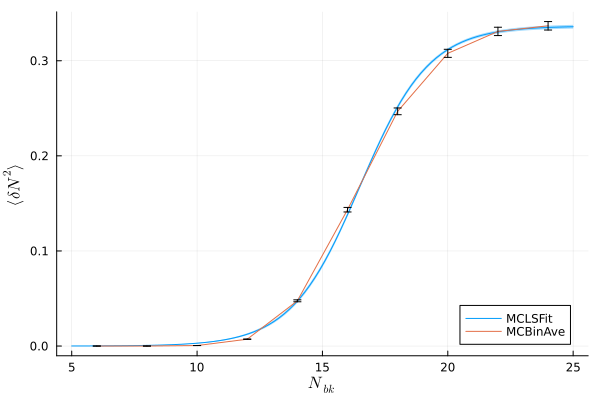

In [15]:
plot(NsPS, delNSqFitVals, ribbon = delNSqErrVals, fillalpha = 0.35, label="MCLSFit")
plot!(NBksdelNSq, delNSqBinAve, yerror = delNSqBinAveErr, label="MCBinAve", legend=:bottomright, xlabel=L"N_{bk}", ylabel=L"\langle \delta N^2 \rangle")

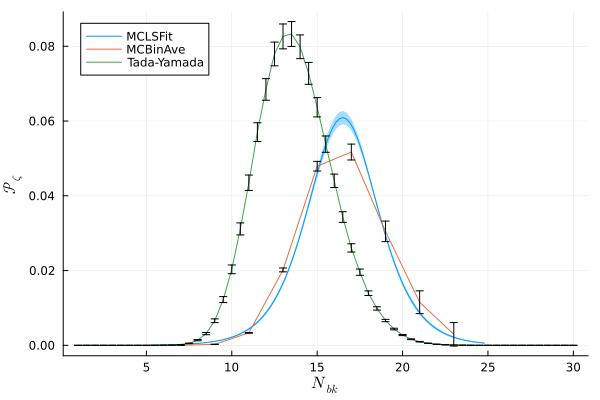

In [17]:
plot(NsPS, psFitVals, ribbon = psErrVals, fillalpha = 0.35, label="MCLSFit")
plot!(NBksPS, psBinAve, yerror = psBinAveErr, label="MCBinAve", legend=:topleft, xlabel=L"N_{bk}", ylabel=L"\mathcal{P}_\zeta")
plot!(NbkCompare, psCompare, yerror = psErrCompare, label="Tada-Yamada")